# Problem Statement:
Consider a real estate  company that has a dataset containing the prices of properties in a particular region. It wishes to use the data to optimize the sale prices of the properties based on imporatant factors such as area, bedrooms, parking, etc.

Esentially, the company wants the following things:-
1. To identify the features affecting the house price and creating a linear model that quantitatively relates to the features.
2. To know the accuracy of he model, i.e. how well the features can predict the house prices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pandas_profiling as pp
import statsmodels.api as sm

In [2]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
# What type of data is present in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# It gives the statistical report of the dataset:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
# Get the value counts for each column
for i in df.columns:
    print(df[i].value_counts())
    print('********************************')

3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: price, Length: 219, dtype: int64
********************************
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64
********************************
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64
********************************
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
********************************
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
********************************
yes    468
no      77
Name: mainroad, dtype: int64
********************************
no     448
yes     97
Name: guestroom, dtype: int64
********************************
no     354
yes    191
Name: basement, dtype: int64
********************************
no    

In [6]:
# Dropping hotwaterheating column as it is having very less unique values
df = df.drop('hotwaterheating', axis=1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,0,no,furnished


In [7]:
# Converting Yes to 1 and No to 0 using map function:
df["mainroad"]=df["mainroad"].map({'yes':1,'no':0})
df["guestroom"]=df["guestroom"].map({'yes':1,'no':0})
df["basement"]=df["basement"].map({'yes':1,'no':0}) 
df["airconditioning"]=df["airconditioning"].map({'yes':1,'no':0})
df["prefarea"]=df["prefarea"].map({'yes':1,'no':0})

In [8]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,furnished


In [9]:
# to perform the above operation we need to split the columns on the basis of their datatype
catcol = []    # here we distribue colums  and store it in a list
numcol = []

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catcol.append(i)
    else:
        numcol.append(i)

In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[catcol]=oe.fit_transform(df[catcol])

In [11]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,1,0.0
1,12250000,8960,4,4,4,1,0,0,1,3,0,0.0
2,12250000,9960,3,2,2,1,0,1,0,2,1,1.0
3,12215000,7500,4,2,2,1,0,1,1,3,1,0.0
4,11410000,7420,4,1,2,1,1,1,1,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,2,0,2.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,1.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,2.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   airconditioning   545 non-null    int64  
 9   parking           545 non-null    int64  
 10  prefarea          545 non-null    int64  
 11  furnishingstatus  545 non-null    float64
dtypes: float64(1), int64(11)
memory usage: 51.2 KB


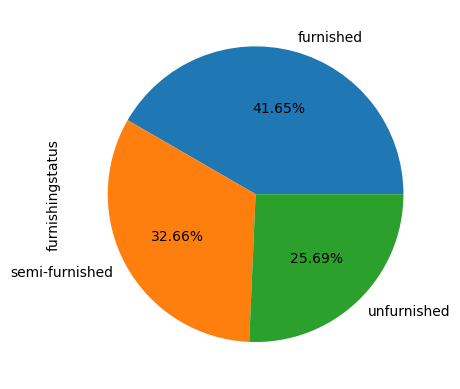

In [13]:
# bivariate analysis:
labels=['furnished','semi-furnished','unfurnished']
df['furnishingstatus'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=labels)
plt.show()

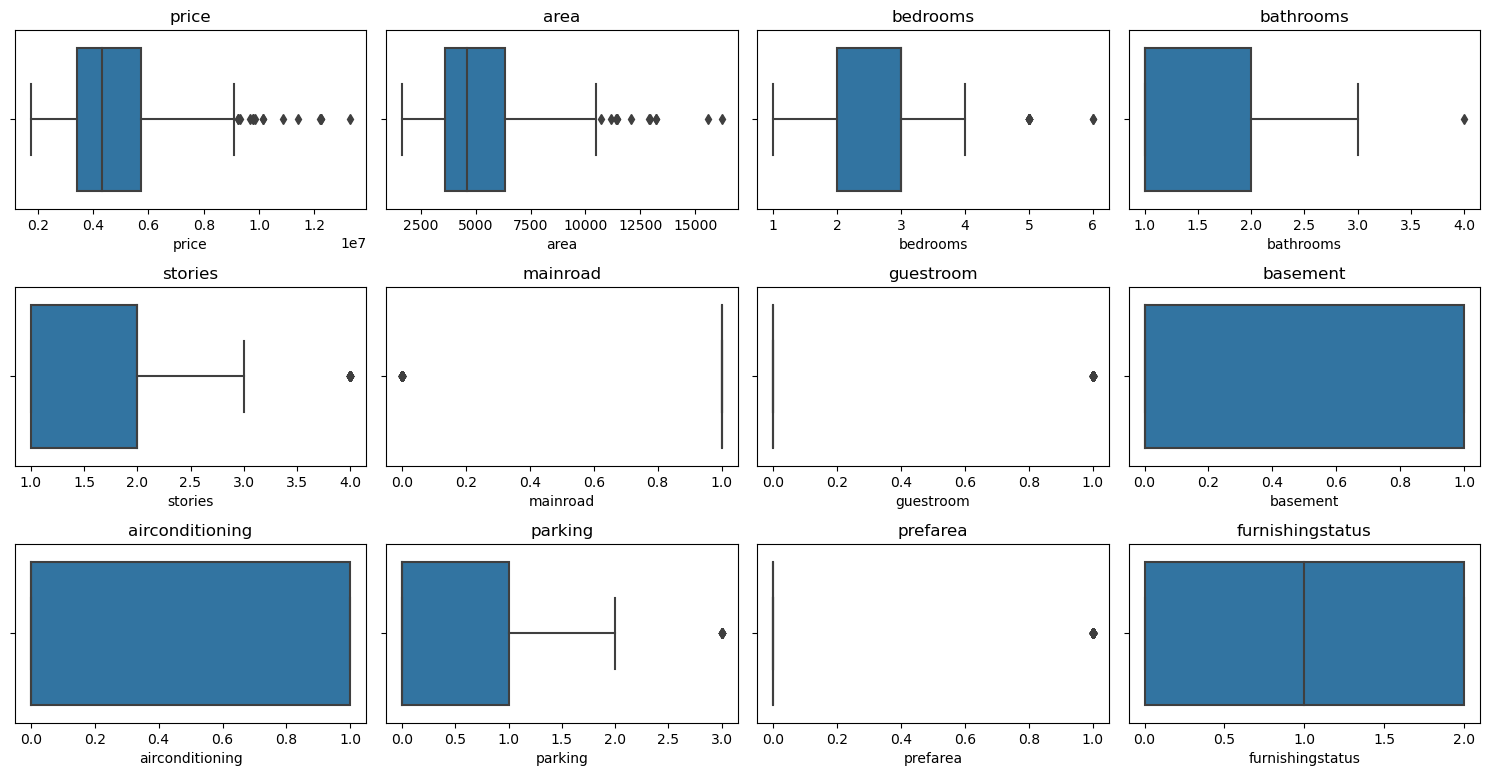

In [14]:
# Checking whether any outliers are there or not?
# Plot box plots for all columns
plt.figure(figsize=(15, 10))
for column in df.columns:
    plt.subplot(4, 4, list(df.columns).index(column) + 1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Calculate skewness for each column
skewness = df.skew()
skewness

price               1.212239
area                1.321188
bedrooms            0.495684
bathrooms           1.589264
stories             1.082088
mainroad           -2.065410
guestroom           1.688419
basement            0.628590
airconditioning     0.795748
parking             0.842062
prefarea            1.254361
furnishingstatus   -0.117666
dtype: float64

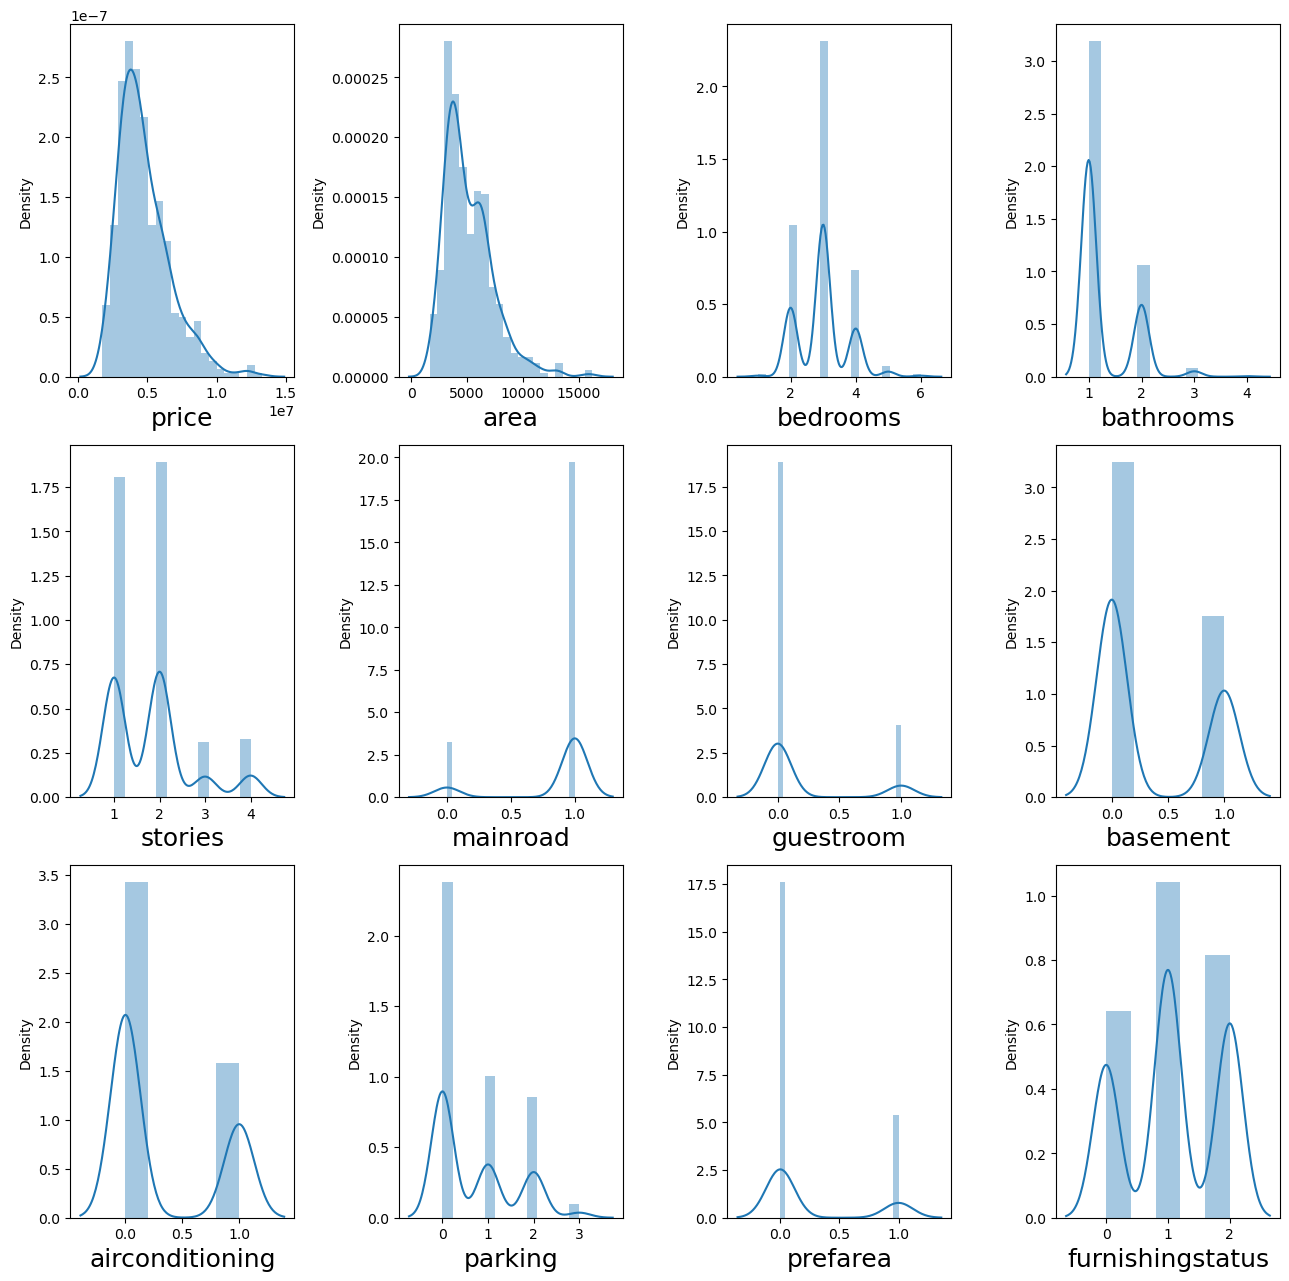

In [16]:
# Plot the skewness using distplot
plt.figure(figsize=(13,25))
pltn=1
for i in df:
    if pltn<=23:
        ax=plt.subplot(6,4,pltn)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=18)
    pltn=pltn+1
plt.tight_layout()
plt.show()

In [17]:
# Treating the outliers using Z-score:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<=3).all(axis=1)] 
new_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,1,1,1,1,2,1,0.0
9,9800000,5750,3,2,4,1,1,0,1,1,1,2.0
12,9310000,6550,4,2,2,1,0,0,1,1,1,1.0
13,9240000,3500,4,2,2,1,0,0,0,2,0,0.0
14,9240000,7800,3,2,2,1,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,2,0,2.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,1.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,2.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0.0


In [18]:
df.shape

(545, 12)

In [19]:
data_loss=((545-499)/545)*100
data_loss

8.440366972477065

In [20]:
new_df.skew()

price               0.801228
area                0.844266
bedrooms            0.298626
bathrooms           1.187898
stories             1.089925
mainroad           -2.037555
guestroom           1.687019
basement            0.645884
airconditioning     0.802951
parking             0.900962
prefarea            1.274806
furnishingstatus   -0.138378
dtype: float64

In [21]:
# Power Transformation (for removing the skewness)
skew_column=['mainroad']

from sklearn.preprocessing import PowerTransformer
strans=PowerTransformer(method='yeo-johnson')

new_df[skew_column]=strans.fit_transform(new_df[skew_column].values)
new_df.skew()

price               0.801228
area                0.844266
bedrooms            0.298626
bathrooms           1.187898
stories             1.089925
mainroad           -2.037555
guestroom           1.687019
basement            0.645884
airconditioning     0.802951
parking             0.900962
prefarea            1.274806
furnishingstatus   -0.138378
dtype: float64

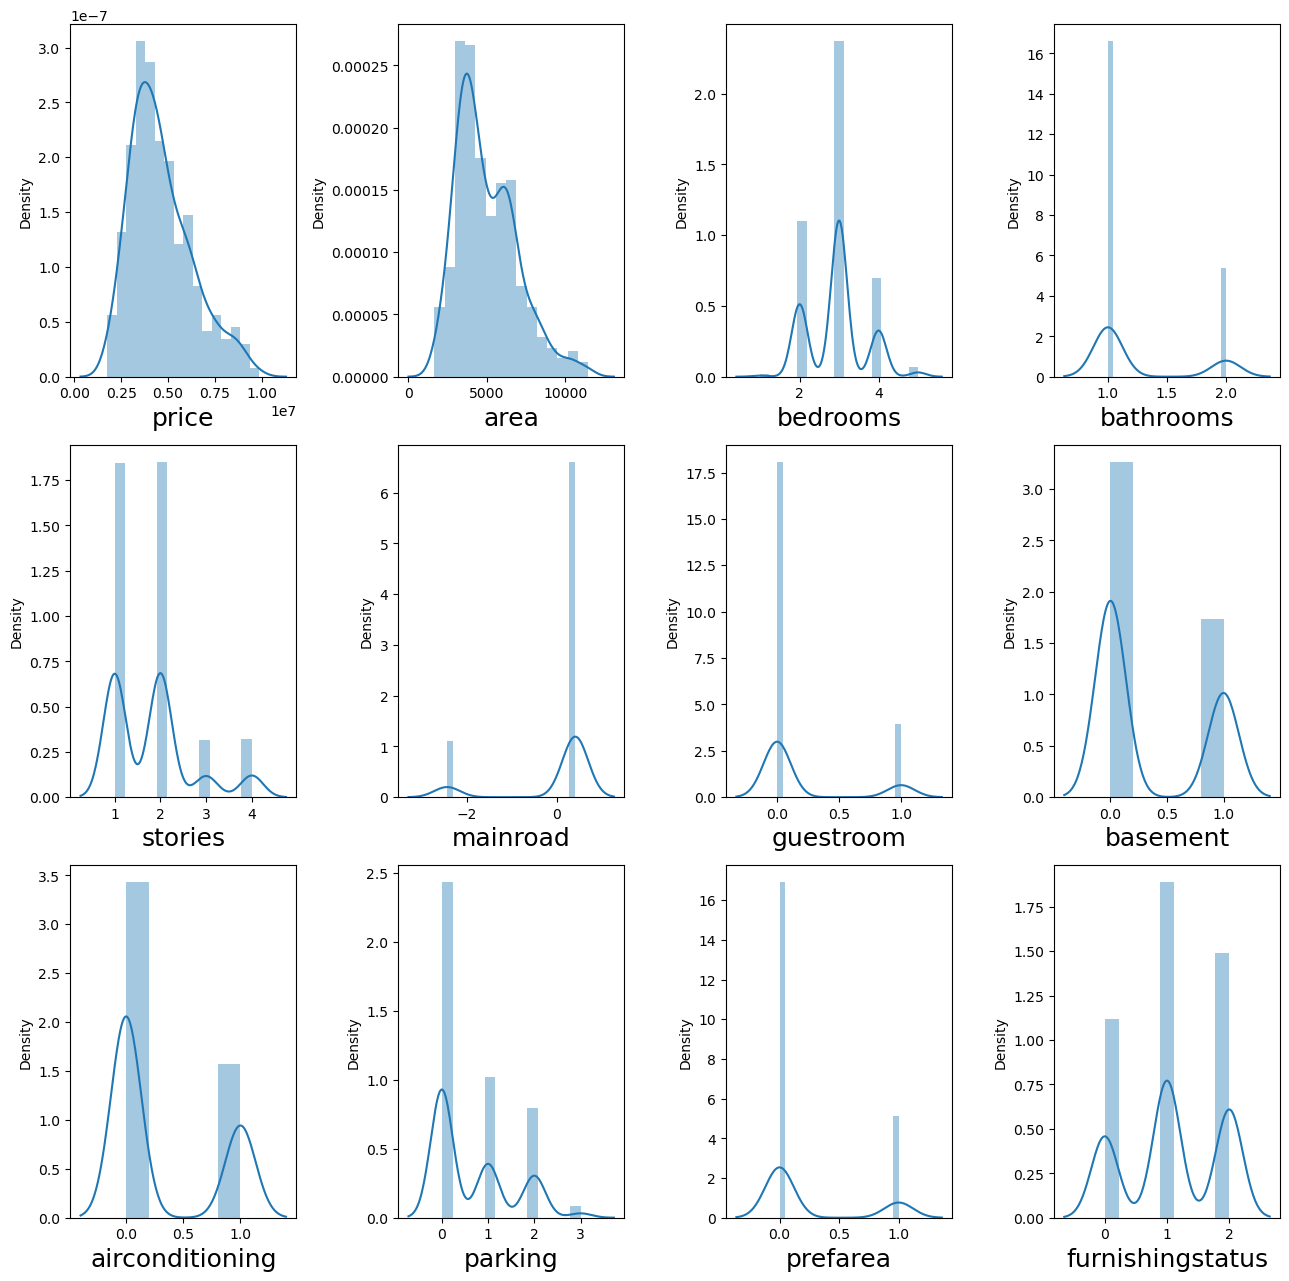

In [22]:
# Plot the skewness using distplot of the new_data
plt.figure(figsize=(13,25))
pltn=1
for i in new_df:
    if pltn<=23:
        ax=plt.subplot(6,4,pltn)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=18)
    pltn=pltn+1
plt.tight_layout()
plt.show()

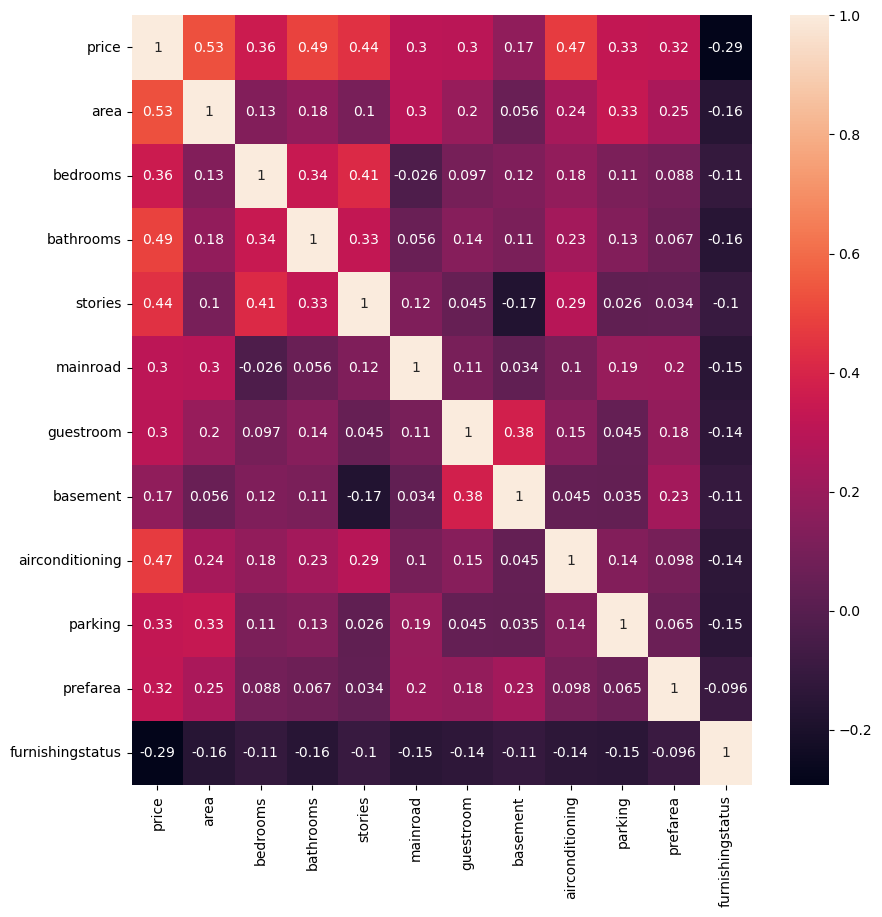

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [24]:
# segregatting target and feature
x = new_df.drop('price',axis=1) #features(dataframe)
y = new_df['price']  # this is give series

In [25]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
8,8100,4,1,2,0.409616,1,1,1,2,1,0.0
9,5750,3,2,4,0.409616,1,0,1,1,1,2.0
12,6550,4,2,2,0.409616,0,0,1,1,1,1.0
13,3500,4,2,2,0.409616,0,0,0,2,0,0.0
14,7800,3,2,2,0.409616,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0.409616,0,1,0,2,0,2.0
541,2400,3,1,1,-2.441311,0,0,0,0,0,1.0
542,3620,2,1,1,0.409616,0,0,0,0,0,2.0
543,2910,3,1,1,-2.441311,0,0,0,0,0,0.0


In [26]:
y

8      9870000
9      9800000
12     9310000
13     9240000
14     9240000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 522, dtype: int64

In [27]:
# Feature Scaling:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.6148198 ,  1.52212143, -0.5699764 , ...,  1.592718  ,
         1.82045313, -1.42904315],
       [ 0.38978815,  0.10074865,  1.75445861, ...,  0.40330627,
         1.82045313,  1.21152508],
       [ 0.8068202 ,  1.52212143,  1.75445861, ...,  0.40330627,
         1.82045313, -0.10875904],
       ...,
       [-0.72055968, -1.32062413, -0.5699764 , ..., -0.78610545,
        -0.54931379,  1.21152508],
       [-1.09067563,  0.10074865, -0.5699764 , ..., -0.78610545,
        -0.54931379, -1.42904315],
       [-0.60066297,  0.10074865, -0.5699764 , ..., -0.78610545,
        -0.54931379,  1.21152508]])

In [28]:
# For splitting the data for the testing and training in the ratio of 30% to 70%:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
# model building by linear regression:
# 1. import the model
from sklearn.linear_model import LinearRegression
# 2. Create object of model
lr = LinearRegression()
# 3. Train the model
lr.fit(xtrain,ytrain)
# 4. Predict the target:
ypred=lr.predict(xtest)

In [30]:
ypred

array([5010937.22136283, 4879287.25604751, 2902584.83555199,
       2771516.75100257, 4533071.60419162, 4744416.39708534,
       4473963.78727797, 6108289.61299837, 5260700.73462946,
       3996424.26760121, 6239298.85578577, 4478679.0262495 ,
       5594480.83477682, 3195783.0856353 , 2682730.92090197,
       5152282.00429467, 3248964.31914961, 3616768.5864552 ,
       3707671.60340988, 2821983.65732335, 6293936.76008294,
       4841236.15483467, 4330198.80256218, 4869088.4479798 ,
       7044750.79916069, 4705569.68577215, 4913070.29090865,
       2688644.93103365, 3412136.07361575, 4138995.78396931,
       2249005.68979719, 2276710.60623292, 4011709.44024631,
       3129425.58531501, 3831079.49464451, 2745387.30137618,
       3542469.2966069 , 4659909.80494995, 7861535.43970329,
       4285921.39783843, 5001320.97664584, 2590797.12134911,
       3864357.42700733, 5847218.84306905, 3152054.10827183,
       4376252.74013913, 3320315.32725971, 4387212.83223587,
       4233700.76941265,

In [31]:
lr.intercept_

4609723.899323713

In [32]:
lr.coef_

array([ 401660.77497643,   68840.35706704,  358761.1438318 ,
        410643.70235793,  189789.00416539,  174678.46412581,
         96018.56611776,  368969.98359985,  204932.77259822,
        210267.72517484, -193086.64936053])

In [33]:
# model evaluation:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest,ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest,ypred)

In [34]:
print(f"MAE:{mae}\nMSE:{mse}\nRMSE:{rmse}\nAccuracy:{r2}")

MAE:688802.895360758
MSE:945480569633.0337
RMSE:972358.2516917485
Accuracy:0.6383204497382078


In [35]:
# Checking Over fitting or Under Fitting

In [36]:
from sklearn.linear_model import Ridge,Lasso

In [37]:
# For L2 --> (Ridge)

In [38]:
l2=Ridge(alpha=10)    # taking number 10 randomly 
l2.fit(xtrain,ytrain)
ypred=l2.predict(xtest)
train = l2.score(xtrain,ytrain)
test=l2.score(xtest,ytest)
print(f"Training Score:{train}\nTesting Score:{test}")

Training Score:0.654000470983332
Testing Score:0.6386488173307947


In [39]:
# For L1 --> (Lasso)

In [40]:
l1=Lasso(alpha=10)
l1.fit(xtrain,ytrain)
ypred=l1.predict(xtest)
train=l1.score(xtrain,ytrain)
test=l1.score(xtest,ytest)
print(f"Training Score:{train}\nTesting Score:{test}")

Training Score:0.654108739024237
Testing Score:0.6383212742819708


In [41]:
 # model building by StatsModels.api:
x_new=sm.add_constant(x)
x_new

array([[ 1.        ,  1.6148198 ,  1.52212143, ...,  1.592718  ,
         1.82045313, -1.42904315],
       [ 1.        ,  0.38978815,  0.10074865, ...,  0.40330627,
         1.82045313,  1.21152508],
       [ 1.        ,  0.8068202 ,  1.52212143, ...,  0.40330627,
         1.82045313, -0.10875904],
       ...,
       [ 1.        , -0.72055968, -1.32062413, ..., -0.78610545,
        -0.54931379,  1.21152508],
       [ 1.        , -1.09067563,  0.10074865, ..., -0.78610545,
        -0.54931379, -1.42904315],
       [ 1.        , -0.60066297,  0.10074865, ..., -0.78610545,
        -0.54931379,  1.21152508]])

In [42]:
statsmodel=sm.OLS(y,x_new)
results=statsmodel.fit()
results

In [43]:
results.params

const    4.628689e+06
x1       4.420184e+05
x2       8.547551e+04
x3       3.921856e+05
x4       3.876940e+05
x5       1.452108e+05
x6       1.447252e+05
x7       1.264619e+05
x8       3.455006e+05
x9       1.971230e+05
x10      2.289335e+05
x11     -1.512240e+05
dtype: float64

In [ ]:
print(results.summary())